# Predict Air Quality: Calling MATLAB from Python Using MATLAB Engine API

Import the weather data and use the MATLAB code to predict air quality.

This example uses the MATLAB Engine API, which runs a MATLAB session. More info and set up instructions are included here: https://www.mathworks.com/help/matlab/matlab-engine-for-python.html

First, import and start MATLAB through the MATLAB Engine API.

In [9]:
import matlab.engine

In [10]:
m = matlab.engine.start_matlab()
# m = matlab.engine.start_matlab("-desktop")

Test a simple function 

In [11]:
x = m.sqrt(42.0)
print(x)

6.48074069840786


Specify number of output arguments (also for zero outputs)

In [12]:
x = m.gcd(10,5,nargout=2)
print(x)

(5, 0)


In [13]:
x[1]

0

Exchange data between workspaces

In [14]:
m.workspace['a'] = 42

In [15]:
m.desktop(nargout=0) # reveals MATLAB desktop if started in default headless mode

## Use MATLAB to predict temperature

Read the current weather data

In [16]:
import weather

In [17]:
appid ='b1b15e88fa797225412429c1c50c122a1'
json_data = weather.get_current_weather("London","UK",appid,api="samples")
data = weather.parse_current_json(json_data)
print(data)

{'temp': 280.32, 'pressure': 1012, 'humidity': 81, 'temp_min': 279.15, 'temp_max': 281.15, 'speed': 4.1, 'deg': 80, 'lon': -0.13, 'lat': 51.51, 'city': 'London', 'current_time': '2022-08-25 14:59:37.352525'}


Predict air quality from user-defined function.

In [18]:
aq = m.predictAirQual(data)
print(aq)

Good


Going further in data preprocessing

In [19]:
json_data = weather.get_forecast("Muenchen","DE",appid,api="samples")
data = weather.parse_forecast_json(json_data)
print(data)

{'current_time': ['2017-02-16 12:00:00', '2017-02-16 15:00:00', '2017-02-16 18:00:00', '2017-02-16 21:00:00', '2017-02-17 00:00:00', '2017-02-17 03:00:00', '2017-02-17 06:00:00', '2017-02-17 09:00:00', '2017-02-17 12:00:00', '2017-02-17 15:00:00', '2017-02-17 18:00:00', '2017-02-17 21:00:00', '2017-02-18 00:00:00', '2017-02-18 03:00:00', '2017-02-18 06:00:00', '2017-02-18 09:00:00', '2017-02-18 12:00:00', '2017-02-18 15:00:00', '2017-02-18 18:00:00', '2017-02-18 21:00:00', '2017-02-19 00:00:00', '2017-02-19 03:00:00', '2017-02-19 06:00:00', '2017-02-19 09:00:00', '2017-02-19 12:00:00', '2017-02-19 15:00:00', '2017-02-19 18:00:00', '2017-02-19 21:00:00', '2017-02-20 00:00:00', '2017-02-20 03:00:00', '2017-02-20 06:00:00', '2017-02-20 09:00:00', '2017-02-20 12:00:00', '2017-02-20 15:00:00', '2017-02-20 18:00:00', '2017-02-20 21:00:00'], 'temp': [286.67, 285.66, 277.05, 272.78, 273.341, 275.568, 276.478, 276.67, 278.253, 276.455, 275.639, 275.459, 275.035, 274.965, 274.562, 275.648, 277.9

Send to the MATLAB workspace for further processing

In [20]:
t = matlab.double(data['temp'])
m.workspace['t'] = t
m.signalAnalyzer(nargout=0)

In [21]:
m.workspace['data'] = data
m.eval("TT = timetable(datetime(string(data.current_time))',cell2mat(data.temp)','VariableNames',{'Temp'})",nargout=0)

On the MATLAB side, creates a timetable:
```matlab
TT = timetable(datetime(string(data.current_time))',cell2mat(data.temp)','VariableNames',{'Temp'})
```

Another alternative is to create a csv file to import from MATLAB

In [22]:
import csv
with open("data.csv","w") as f:
    write = csv.writer(f,lineterminator = '\n')
    write.writerow(['Time','Temp'])
    write.writerows([[data['current_time'][i],data['temp'][i]] for i in range(36)])

In [23]:
m.dataCleaner(nargout=0)

Export the processing steps as a function `preprocess.m`

In [1]:
# TT = m.workspace['TT']
# TT2 = m.preprocess(TT)
# m.parquetwrite("data.parquet",TT2,nargout=0)

<AxesSubplot:>

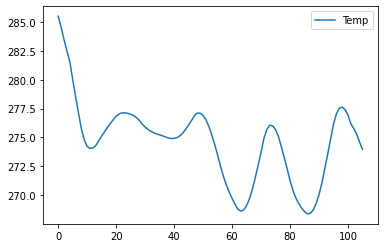

In [ ]:
# import pandas as pd
# pd.read_parquet('data.parquet').plot(y='Temp')

Exit the MATLAB engine

In [25]:
m.exit()